In [73]:
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib nbagg


In [155]:
SAMPLE_RATE = 44_100


class Basic_Signal:
    def __init__(self,signal_type="sine",duration=1,frequency=100,phase=0):
        
        accepted_signal_types = ["sine","sawtooth","traingular","pulse","noise"]
        assert signal_type in accepted_signal_types,f"signal_type need to be one of {str(accepted_signal_types)}"
        
        self.signal_type=signal_type
        self.frequency=frequency
        self.duration=duration
        self.phase = phase
        
        #other default params
        self.modulation_configured=False
        self.ASDR_configured=False
    def modulate(self,beta=0.01,modulation_frequency='not-set',modulation_decay=5):
        self.modulation_configured=True
        
        if modulation_frequency=='not-set':
            modulation_frequency = self.frequency
        
        self.modulation_beta = beta
        self.modulation_frequency = modulation_frequency
        self.modulation_decay=modulation_decay
        return self
    def ASDR(self,attack,sustain,decay,release,unit='fraction'):
        self.ASDR_configured=True
        accepted_units = ["fractions","seconds"]
        assert unit in accepted_units, f"Unit has to be one of {str(accepted_units)}"
        
        self.attack=attack
        self.sustain=sustain
        self.decay=decay
        self.release=release
        
        return self
        
    def generate_wave(self):
        t = np.linspace(0,self.duration,int(self.duration * SAMPLE_RATE))
        
        '''
        According to the wave type (sine, pulse, ..)
            Now need to generate the right wave shape with right frequency
            Also need to apply proper modulations as per requirement in this stage
        Then later ASDR envelope can be applied
        '''
        
        if self.modulation_configured:
            # frequensy as a function of time : f(t) = f0 * (1 +  beta * sin(omega * t) * mod_decay_function )
            mod_decay_func = np.exp(-self.modulation_decay * t)
            ft = self.frequency * (1 + self.modulation_beta * np.sin(2* np.pi * self.modulation_frequency * t) * mod_decay_func)
        else: # no frequency modulation --> constant frequency
            ft = self.frequency
            
        # now the frequency profile of whole signal is ready
        # generate the required signal with that frquency profile
            
        
        #if the wave type is sine easier to generate the modulated signal
        if self.signal_type == "sine":
            signal = np.sin(2 * np.pi * ft * t + self.phase) 
            #modulated signal is ready
        elif self.signal_type == "pulse":
            pass
            
        #keep the intermidiate signals saved
        self.t = t
        self.ft = ft
        self.signal = signal
           
        
        return self
        #end of generate wave
        
    def play(self):
        print("To play the signal use Audio(**Basic_Signal_instance.player()) method")
    def player(self):
        #return (data=self.signal,rate=SAMPLE_RATE)
        if 'signal' not in dir(self):
            print("call Basic_Signal_instance.generate_wave() before trying to playthe signal.")
            return None
        return {'data':self.signal,'rate':SAMPLE_RATE,'autoplay':1}
    
    
    def plot(self,figsize=(20,15)):
        '''
        Several things to plot
            1. Signal
            2. First 10 periods
            3. Frequency profile
        
        '''
        
        fig,ax = plt.subplots(3,figsize=figsize)
        
        # plotting entrie signal
        ax[0].plot(self.t,self.signal)
        ax[0].grid()
        ax[0].set_title("The entire signal")
        
        # plotting first n_periods_to_show(ten) periods
        n_periods_to_show = 10
        time_period_in_samples = int(SAMPLE_RATE / self.frequency)
        t_for_first10periods = n_periods_to_show  * time_period_in_samples
        
        t_10_periods = self.t[:t_for_first10periods]
        signal_10_periods =  self.signal[:t_for_first10periods]
        
        ax[1].plot(t_10_periods,signal_10_periods)
        ax[1].grid()
        ax[1].set_title(f"First {n_periods_to_show} periods of signal")
        
        
        #plotting the frequency profile
        ax[2].plot(self.t,self.ft)
        ax[2].grid()
        ax[2].set_title("Frequency profile")
        
        plt.show()
        
        
def MIX(signals,weights):
    #NYI
    return 

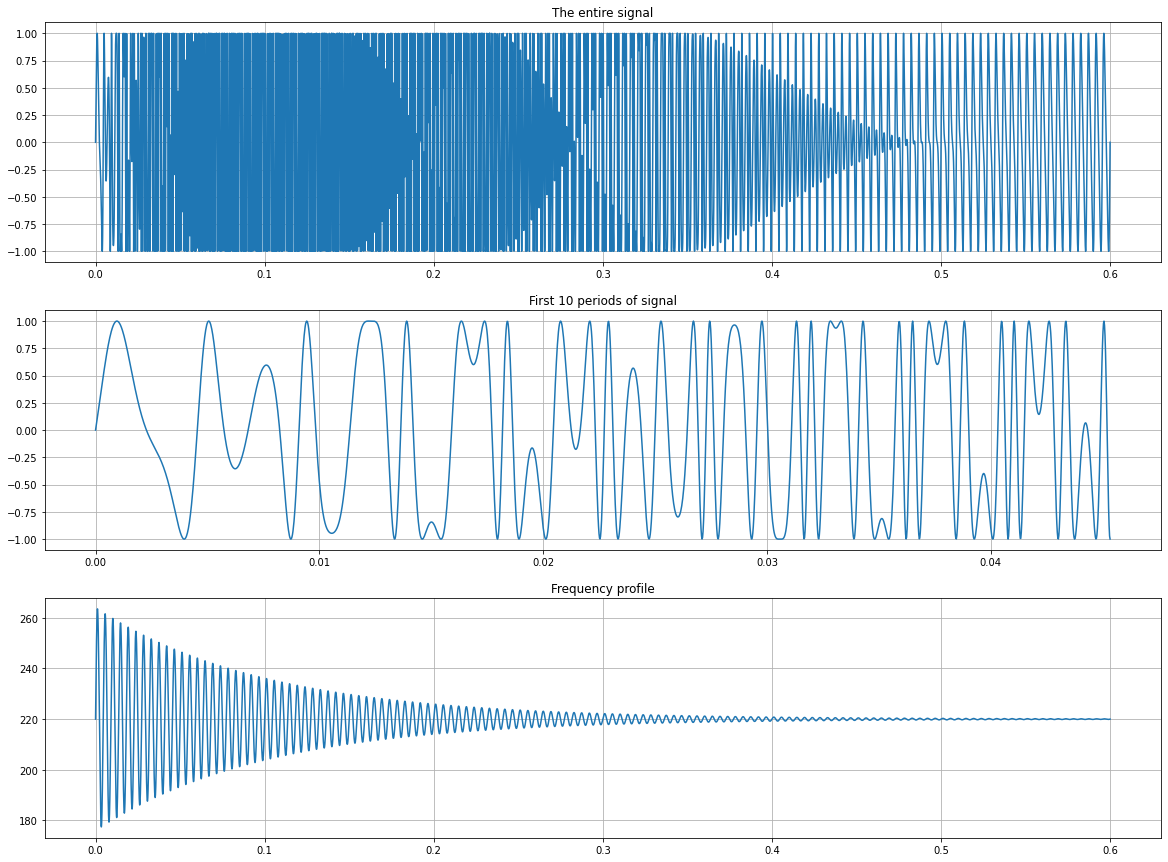

In [156]:
%matplotlib inline
mySine = Basic_Signal(signal_type="sine",duration=0.6,frequency=440/2**1,phase=0)\
        .modulate(beta=0.2,modulation_decay=10)\
        .generate_wave()

mySine.plot()



Audio(**mySine.player())